### Possession 비율 그래프

#### 1. 필요 라이브러리 & 데이터 불러오기

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer.pitch import Pitch
import matplotlib.patches as patches

# 한글 오류
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
df = pd.read_csv(r"C:\krpython\adios-video\adios-video\Kyungran\player_data.csv", index_col=0)
df.head()

,player_id,team,has_ball,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,1,1.0,True,848.676147,254.649963,999.746338,504.151428
1,2,1.0,False,279.895325,97.888031,357.484161,327.861938
2,3,1.0,False,483.955444,90.242813,542.665527,220.719711
3,4,1.0,False,895.455933,161.566589,974.598022,312.147797
4,77,0.0,False,326.304718,235.089417,406.512360,451.280579


In [ ]:
#### 2. 데이터 전처리

In [ ]:
##### 1) 좌표 중앙값 계산

In [3]:
df['x'] = (df['bbox_x1'] + df['bbox_x2']) /2  # 세로
df['y'] = (df['bbox_y1'] + df['bbox_y2']) / 2 # 가로

print(df['x'].head(3))
print(df['y'].head(3))

0    924.211243
1    318.689743
2    513.310486
Name: x, dtype: float64
0    379.400696
1    212.874985
2    155.481262
Name: y, dtype: float64


In [4]:
##### 2) 팀 구분 짓기

In [5]:
# 팀 구분
team_a = df[df['team']==0]
team_b = df[df['team']==1]

In [6]:
##### 3) 영역 지정

In [7]:
# 가로 기준 시각화
# team a 영역 지정
team_a['region_y'] = pd.cut(team_a['y'], bins = [0, 250, 500, 750], labels=['Left Side', 'Middle', 'Right Side'])

# team b 영역 지정
team_b['region_y'] = pd.cut(team_b['y'], bins = [0, 250, 500, 750], labels=['Right Side', 'Middle', 'Left Side'])

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12112\1974371383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_a['region_y'] = pd.cut(team_a['y'], bins = [0, 250, 500, 750], labels=['Left Side', 'Middle', 'Right Side'])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_12112\1974371383.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_b['region_y'] = pd.cut(team_b['y'], bins = [0, 250, 500, 750], labels=['Right Side', 'Middle', 'Left Side'])


In [8]:
# 세로 기준 시각화
# team a 영역 지정
team_a['region_x'] = pd.cut(team_a['x'], bins=[0, 450, 900, 1350], labels=['Deffensive', 'Middle', 'Offensive'])

# team b 영역 지정
team_b['region_x'] = pd.cut(team_b['x'], bins=[0, 450, 900, 1350], labels=['Offensive', 'Middle', 'Deffensive'])

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12112\204995787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_a['region_x'] = pd.cut(team_a['x'], bins=[0, 450, 900, 1350], labels=['Deffensive', 'Middle', 'Offensive'])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_12112\204995787.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_b['region_x'] = pd.cut(team_b['x'], bins=[0, 450, 900, 1350], labels=['Offensive', 'Middle', 'Deffensive'])


In [9]:
##### 4) 팀 영역별 비율 계산

In [10]:
# 가로 기준 
team_a_distribution_y = team_a['region_y'].value_counts(normalize=True)*100 # 영역 비율 계산
team_a_distribution_y = team_a_distribution_y.reindex(['Left Side', 'Middle', 'Right Side']) # 위치 고정

team_b_distribution_y = team_b['region_y'].value_counts(normalize=True)*100
team_b_distribution_y = team_b_distribution_y.reindex(['Right Side', 'Middle', 'Left Side'])

print(team_a_distribution_y)
print('---')
print(team_b_distribution_y)

region_y
Left Side     37.920489
Middle        61.646279
Right Side     0.433231
Name: proportion, dtype: float64
---
region_y
Right Side    51.649720
Middle        47.374974
Left Side      0.975306
Name: proportion, dtype: float64


In [11]:
# 세로 기준 
team_a_distribution_x = team_a['region_x'].value_counts(normalize=True)*100 # 영역 비율 계산
team_a_distribution_x = team_a_distribution_x.reindex(['Deffensive', 'Middle', 'Offensive']) 

# 위치 고정
team_b_distribution_x = team_b['region_x'].value_counts(normalize=True)*100
team_b_distribution_x = team_b_distribution_x.reindex(['Offensive', 'Middle', 'Deffensive'])

print(team_a_distribution_x)
print('---')
print(team_b_distribution_x)

region_x
Deffensive    23.012232
Middle        68.603466
Offensive      8.384302
Name: proportion, dtype: float64
---
region_x
Offensive     25.959743
Middle        63.083627
Deffensive    10.956630
Name: proportion, dtype: float64


Text(0.7, 1.02, 'team_b')

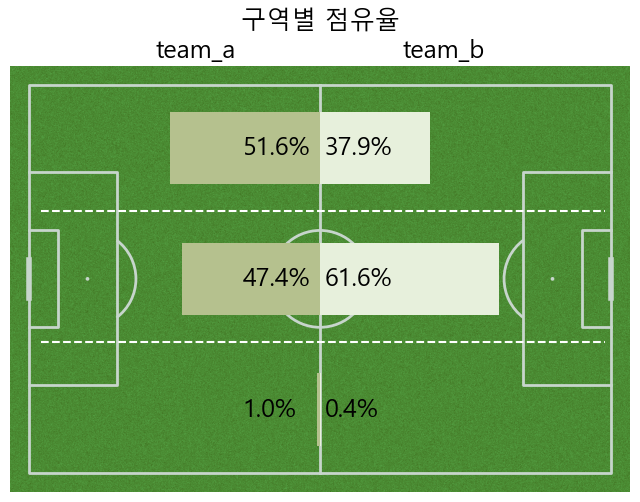

In [15]:
# 축구장 시각화 설정
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor('#FFFFFF')
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='#c7d5cc')

# 각 축구장 그리기
pitch.draw(ax)

# 막대 너비 및 최대 길이 설정
bar_height = 15
max_length = 60  # 막대 최대 길이 설정
bar_spacing = 27  # 막대 간격 축소


# team_a 막대 그래프 그리기
for idx, (region, value) in enumerate(team_a_distribution_y.items()):
    if value > 0 or region in ['Left Side', 'Right Side', 'Middle']:
        y_start = 13 + (idx * bar_spacing)  # 막대 시작 위치 y 좌표
        #y_start = 10 + (idx * 30)  # 막대 시작 위치 y 좌표
        length = (value / 100) * max_length  # 막대 길이 설정
        ax.barh(y_start, length, height=bar_height, left=60, color='#E7F0DC',) #edgecolor='black')  # 막대 그리기 left : x좌표 이동
        ax.text(61, y_start, f'{value:.1f}%', color='black', va='center', fontsize=18)  # 비율 텍스트
        if idx < len(team_a_distribution_y) - 1:
            ax.axhline(y=y_start + 13, xmin=0.05, xmax=0.96, color='white', linestyle='--')

# team_b 막대 그래프 그리기
for idx, (region, value) in enumerate(team_b_distribution_y.items()):
    if value > 0 or region in ['Right Side', 'Left Side', 'Middle']:
        y_start = 13 + (idx * bar_spacing)  # 막대 시작 위치 y 좌표
        #y_start = 10 + (idx * 30)  # 막대 시작 위치 y 좌표
        length = (value / 100) * max_length  # 막대 길이 설정
        ax.barh(y_start, -length, height=bar_height, left=60, color='#B5C18E',)  # 막대 그리기
        ax.text(44 , y_start, f'{value:.1f}%', color='black', va='center', fontsize=18)  # 비율 텍스트
             
plt.title('구역별 점유율\n', fontsize=18 )
ax.text(0.3, 1.02, 'team_a', transform=ax.transAxes, fontsize=18, ha='center')
ax.text(0.7, 1.02, 'team_b', transform=ax.transAxes, fontsize=18, ha='center')

Text(100, 70, 'Away Third')

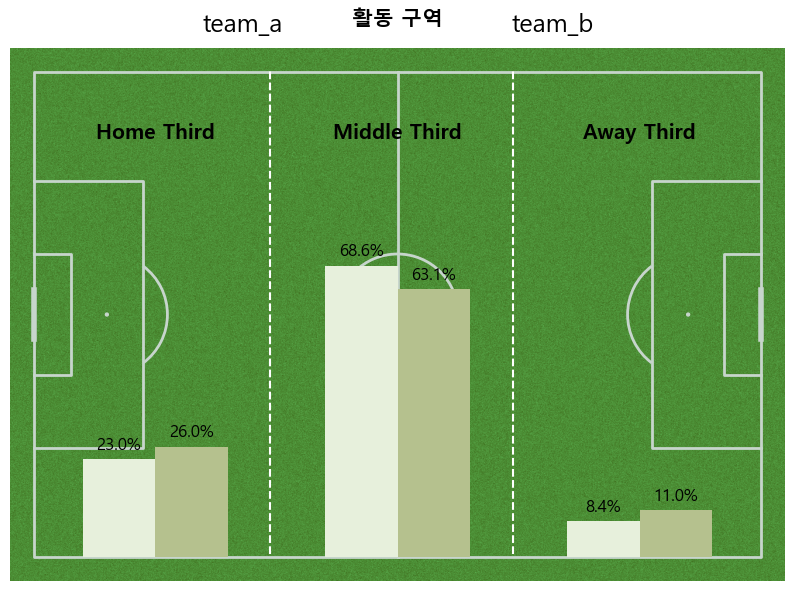

In [19]:
## 2번째 subplot 

fig, ax = plt.subplots(figsize=(10, 10))
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='#c7d5cc')
pitch.draw(ax)


# 축구장의 y축 범위를 설정하여 하단에 맞추기
ax.set_ylim(-5, 85)

# 막대 너비 및 최대 길이 설정
bar_width = 12
max_length = 70  # 막대 최대 길이 설정
bar_spacing = 40  # 막대 간격 축소
base_line = 20  # 기준선 설정 (축구장의 하단에 맞추기 위해 Y 좌표를 사용)

# 팀 A 막대 그래프 그리기
for idx, (region, value) in enumerate(team_a_distribution_x.items()):
    if value > 0 or region in ['Deffensive', 'Offensive Side', 'Middle']:
        x_start = base_line + (idx * bar_spacing)  # 막대 시작 위치 x 좌표
        length = (value / 100) * max_length  # 막대 길이 설정
        ax.bar(x_start - bar_width, length, width=bar_width, bottom=0, color='#E7F0DC', align='edge')  # 막대 그리기
        ax.text(x_start - bar_width / 2, length + 1, f'{value:.1f}%', color='black', ha='center', va='bottom', fontsize=12)  # 비율 텍스트
        if idx < len(team_a_distribution_x) -1:
            ax.axvline(x=x_start + bar_width + 7, color='white', linestyle='--', ymin=0.06, ymax=0.95)

# 팀 B 막대 그래프 그리기
for idx, (region, value) in enumerate(team_b_distribution_x.items()):
    if value > 0:
        x_start = base_line + (idx * bar_spacing)  # 막대 시작 위치 x 좌표
        length = (value / 100) * max_length  # 막대 길이 설정
        ax.bar(x_start, length, width=bar_width, bottom=0, color='#B5C18E', align='edge')  # 막대 그리기
        ax.text(x_start + bar_width / 2, length + 1, f'{value:.1f}%', color='black', ha='center', va='bottom', fontsize=12)  # 비율 텍스트


# subplot 제목 추가
ax.set_title('활동 구역', fontsize=15, color='black', pad=12, weight='bold')

# 팀 텍스트 추가
ax.text(0.3, 1.02, 'team_a', transform=ax.transAxes, fontsize=18, ha='center')
ax.text(0.7, 1.02, 'team_b', transform=ax.transAxes, fontsize=18, ha='center')

# 활동 구역 텍스트 추가
ax.text(20, 70, "Home Third", ha='center', va='center', fontsize=15, color='black', weight='bold')
ax.text(60, 70, "Middle Third", ha='center', va='center', fontsize=15, color='black', weight='bold')
ax.text(100, 70, "Away Third", ha='center', va='center', fontsize=15, color='black', weight='bold')
